In [5]:
import pandas as pd
df = pd.read_csv("CombinedWarData.csv")

In [6]:
df.head

<bound method NDFrame.head of       WarNum                        WarName  WarType  ccode1           SideA  \
0        300  Allied Bombardment of Algiers        3   210.0     Netherlands   
1        300  Allied Bombardment of Algiers        3   200.0  United Kingdom   
2        301                Ottoman-Wahhabi        3   640.0  Ottoman Empire   
3        302            Liberation of Chile        2   230.0           Spain   
4        303       First Bolivar Expedition        2   230.0           Spain   
...      ...                            ...      ...     ...             ...   
1034    1574      Rwandan Social Revolution        8     NaN             NaN   
1035    1577       Dhofar Rebellion Phase 1        8     NaN             NaN   
1036    1581            Angola Guerilla War        8     NaN             NaN   
1037    1582      East Timorese War Phase 1        8     NaN             NaN   
1038    1594                Hemda-Lendu War        9     NaN             NaN   

      cco

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   WarNum             1039 non-null   int64  
 1   WarName            1039 non-null   object 
 2   WarType            1039 non-null   int64  
 3   ccode1             198 non-null    float64
 4   SideA              640 non-null    object 
 5   ccode2             198 non-null    float64
 6   SideB              640 non-null    object 
 7   StartMonth1        977 non-null    float64
 8   StartDay1          977 non-null    float64
 9   StartYear1         977 non-null    float64
 10  EndMonth1          977 non-null    float64
 11  EndDay1            977 non-null    float64
 12  EndYear1           975 non-null    float64
 13  StartMonth2        977 non-null    float64
 14  StartDay2          977 non-null    float64
 15  StartYear2         977 non-null    float64
 16  EndMonth2          977 n

In [8]:
import numpy as np

# Drop duplicated or redundant columns
df = df.loc[:, ~df.columns.duplicated()]

# Convert relevant columns to numeric
for col in ['SideADeaths', 'SideBDeaths']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop columns with more than 70% missing data
threshold = 0.3  # Keep columns with at least 30% non-null values
df = df.loc[:, df.isnull().mean() < (1 - threshold)]

# Create a 'StartDate' and 'EndDate' column using available components
def combine_date_parts(year, month, day):
    try:
        return pd.to_datetime(f"{int(year)}-{int(month)}-{int(day)}", errors='coerce')
    except:
        return pd.NaT

df['StartDate'] = df.apply(lambda row: combine_date_parts(row['StartYear1'], row['StartMonth1'], row['StartDay1']), axis=1)
df['EndDate'] = df.apply(lambda row: combine_date_parts(row['EndYear1'], row['EndMonth1'], row['EndDay1']), axis=1)

# Derive war duration in days
df['DurationDays'] = (df['EndDate'] - df['StartDate']).dt.days

# Create a cleaned DataFrame for EDA
eda_df = df[['WarName', 'WarType', 'SideA', 'SideB', 'StartDate', 'EndDate', 'DurationDays', 'SideADeaths', 'SideBDeaths',  'Initiator', 'Outcome']]

eda_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   WarName       1039 non-null   object        
 1   WarType       1039 non-null   int64         
 2   SideA         640 non-null    object        
 3   SideB         640 non-null    object        
 4   StartDate     879 non-null    datetime64[ns]
 5   EndDate       908 non-null    datetime64[ns]
 6   DurationDays  842 non-null    float64       
 7   SideADeaths   501 non-null    float64       
 8   SideBDeaths   501 non-null    float64       
 9   Initiator     1024 non-null   object        
 10  Outcome       1039 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 89.4+ KB


C:\Users\yaksh\AppData\Local\Temp\ipykernel_11164\3388846204.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df['Decade'] = eda_df['StartDate'].dt.year // 10 * 10


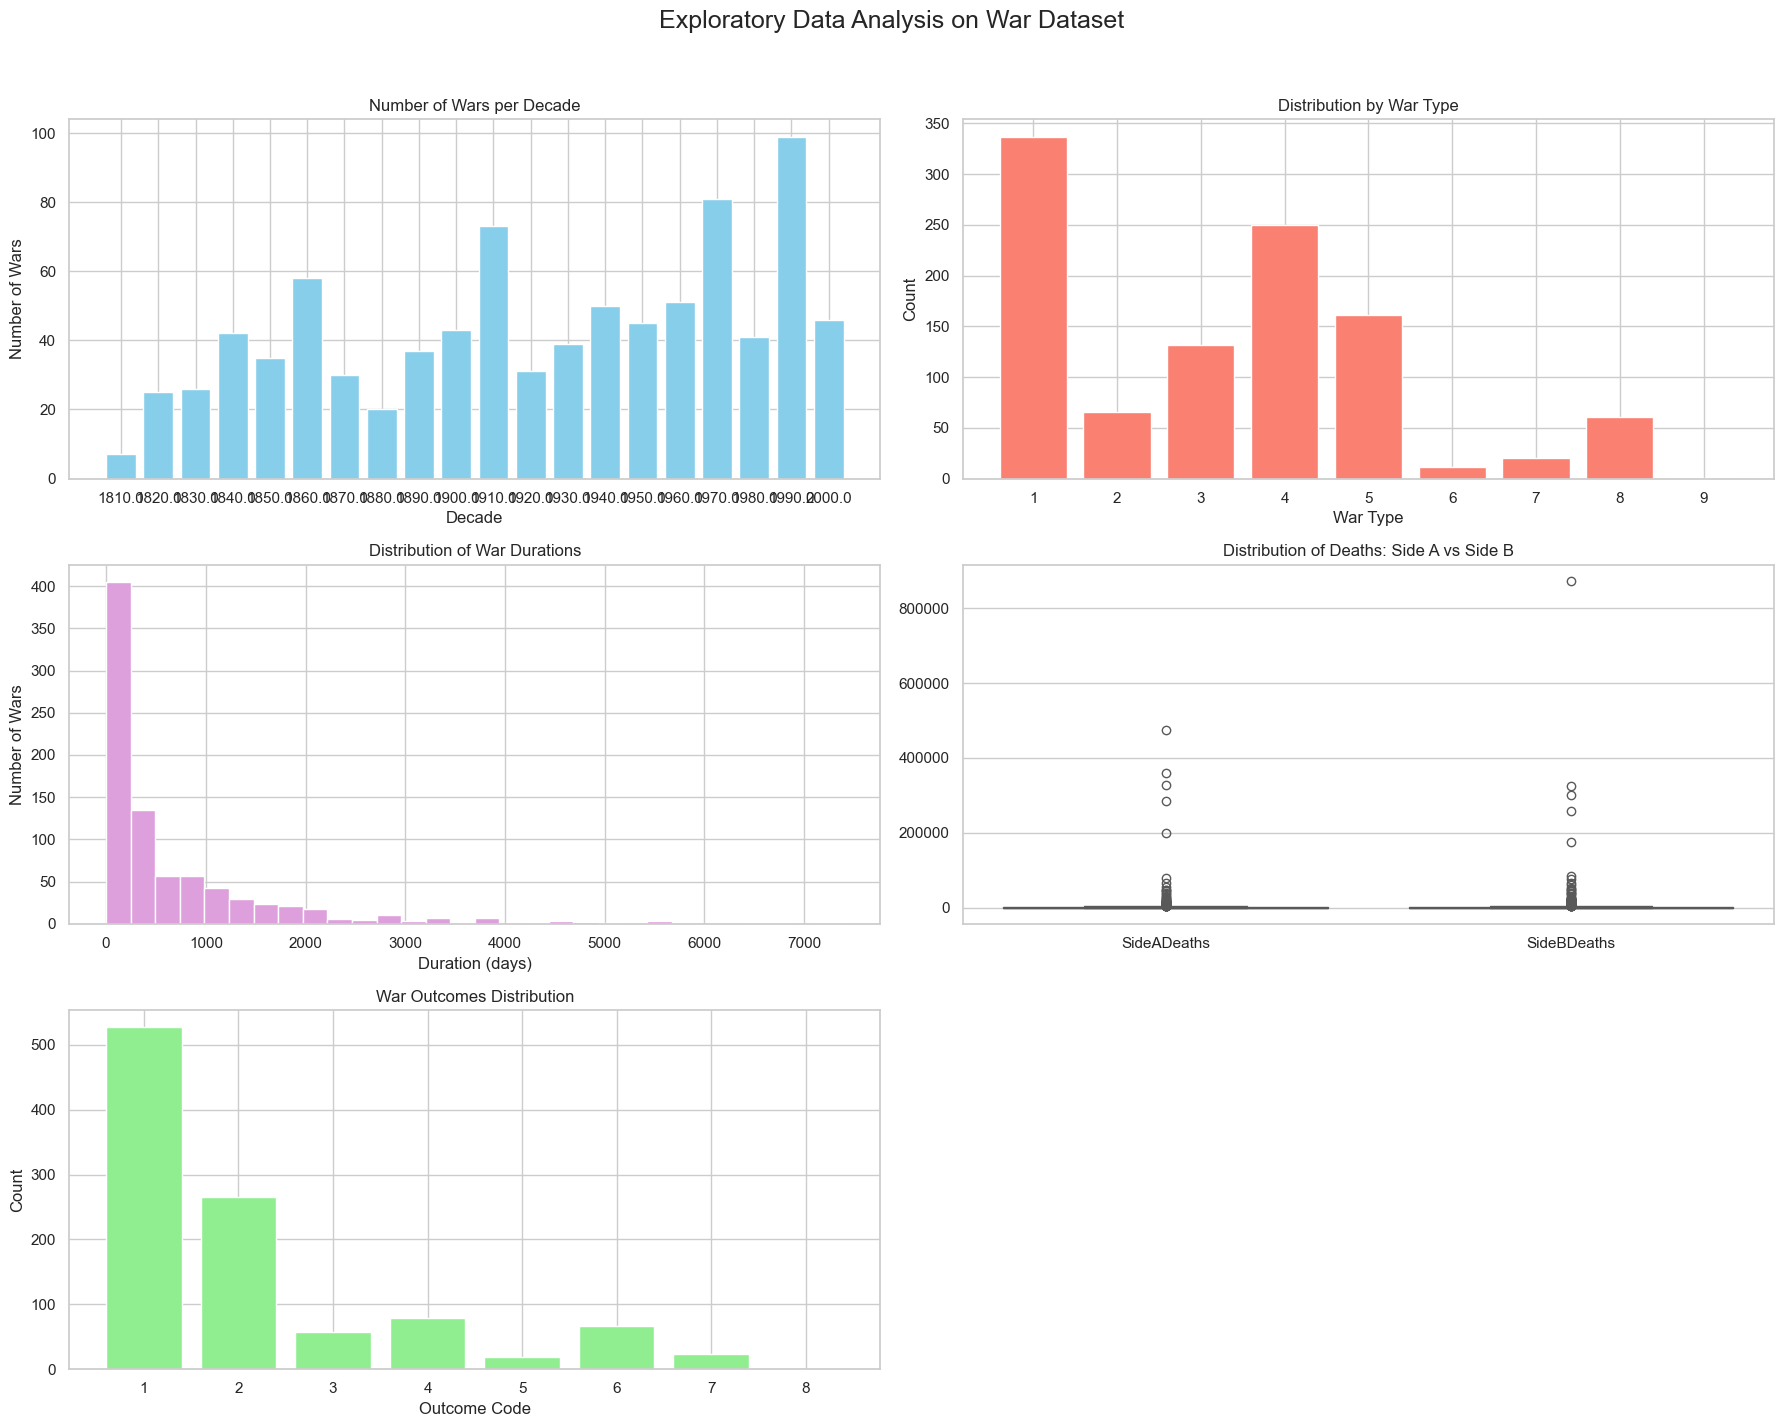

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Update cleaned EDA dataset without 'TotalCombatDeaths'
eda_df = df[['WarName', 'WarType', 'SideA', 'SideB', 'StartDate', 'EndDate', 'DurationDays',
             'SideADeaths', 'SideBDeaths', 'Initiator', 'Outcome']]

# Set up plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Plot 1: Number of wars per decade
eda_df['Decade'] = eda_df['StartDate'].dt.year // 10 * 10
decade_counts = eda_df['Decade'].value_counts().sort_index()

# Plot 2: Distribution by WarType
war_type_counts = eda_df['WarType'].value_counts().sort_index()

# Plot 3: Histogram of war durations
duration_data = eda_df['DurationDays'].dropna()

# Plot 4: SideA and SideB deaths
deaths_df = eda_df[['SideADeaths', 'SideBDeaths']].dropna()

# Plot 5: Outcome distribution
outcome_counts = eda_df['Outcome'].value_counts().sort_index()

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Exploratory Data Analysis on War Dataset', fontsize=18)

# Plot 1
axs[0, 0].bar(decade_counts.index.astype(str), decade_counts.values, color='skyblue')
axs[0, 0].set_title('Number of Wars per Decade')
axs[0, 0].set_xlabel('Decade')
axs[0, 0].set_ylabel('Number of Wars')

# Plot 2
axs[0, 1].bar(war_type_counts.index.astype(str), war_type_counts.values, color='salmon')
axs[0, 1].set_title('Distribution by War Type')
axs[0, 1].set_xlabel('War Type')
axs[0, 1].set_ylabel('Count')

# Plot 3
axs[1, 0].hist(duration_data, bins=30, color='plum')
axs[1, 0].set_title('Distribution of War Durations')
axs[1, 0].set_xlabel('Duration (days)')
axs[1, 0].set_ylabel('Number of Wars')

# Plot 4
sns.boxplot(data=deaths_df, ax=axs[1, 1], palette='Set2')
axs[1, 1].set_title('Distribution of Deaths: Side A vs Side B')

# Plot 5
axs[2, 0].bar(outcome_counts.index.astype(str), outcome_counts.values, color='lightgreen')
axs[2, 0].set_title('War Outcomes Distribution')
axs[2, 0].set_xlabel('Outcome Code')
axs[2, 0].set_ylabel('Count')

# Hide empty subplot
axs[2, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()


C:\Users\yaksh\AppData\Local\Temp\ipykernel_11164\4001883818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df['DurationMonths'] = eda_df['DurationDays'] / 30.44  # Approximate average month length
C:\Users\yaksh\AppData\Local\Temp\ipykernel_11164\4001883818.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='WarType', y='DurationMonths', palette='Set3')


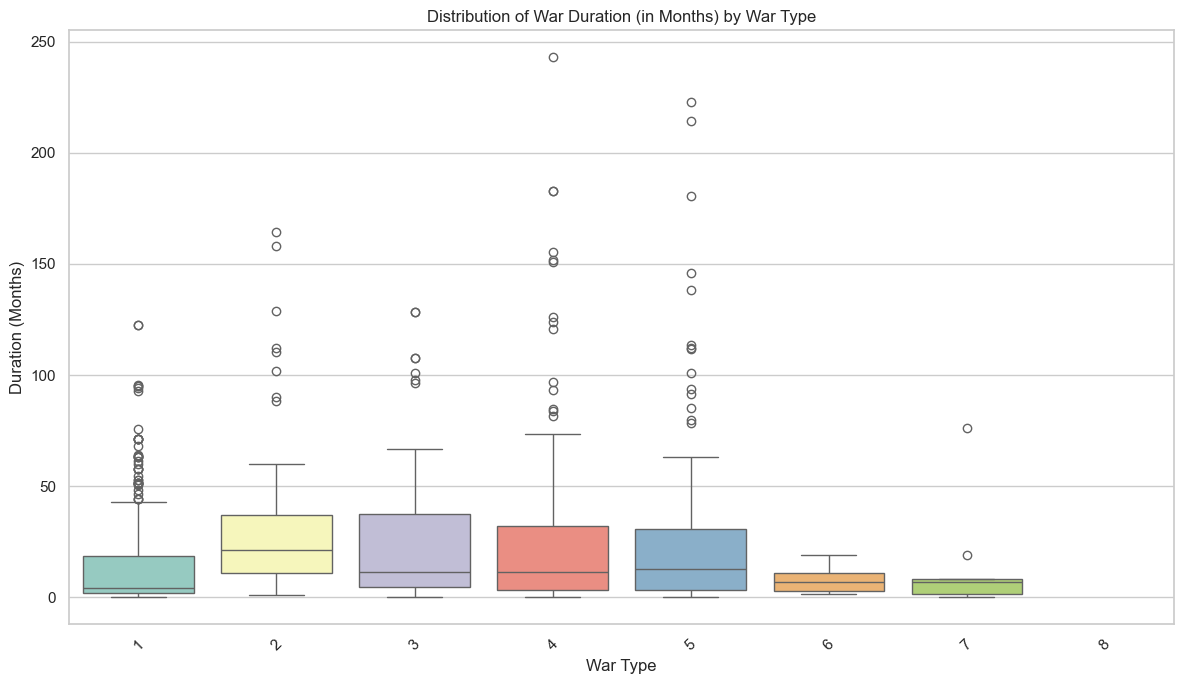

In [10]:
# Convert DurationDays to months for easier interpretation
eda_df['DurationMonths'] = eda_df['DurationDays'] / 30.44  # Approximate average month length

# Filter out war types with very few entries to avoid skewed results
war_type_counts = eda_df['WarType'].value_counts()
valid_war_types = war_type_counts[war_type_counts >= 5].index  # only consider war types with at least 5 entries
filtered_df = eda_df[eda_df['WarType'].isin(valid_war_types)]

# Boxplot for DurationMonths by WarType
plt.figure(figsize=(12, 7))
sns.boxplot(data=filtered_df, x='WarType', y='DurationMonths', palette='Set3')
plt.title('Distribution of War Duration (in Months) by War Type')
plt.xlabel('War Type')
plt.ylabel('Duration (Months)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
eda_df['TotalDeaths'] = eda_df[['SideADeaths', 'SideBDeaths']].sum(axis=1, skipna=True)


C:\Users\yaksh\AppData\Local\Temp\ipykernel_11164\2249505994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df['TotalDeaths'] = eda_df[['SideADeaths', 'SideBDeaths']].sum(axis=1, skipna=True)


C:\Users\yaksh\AppData\Local\Temp\ipykernel_11164\2614038563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=eda_df[eda_df['WarType'].isin(valid_war_types)],


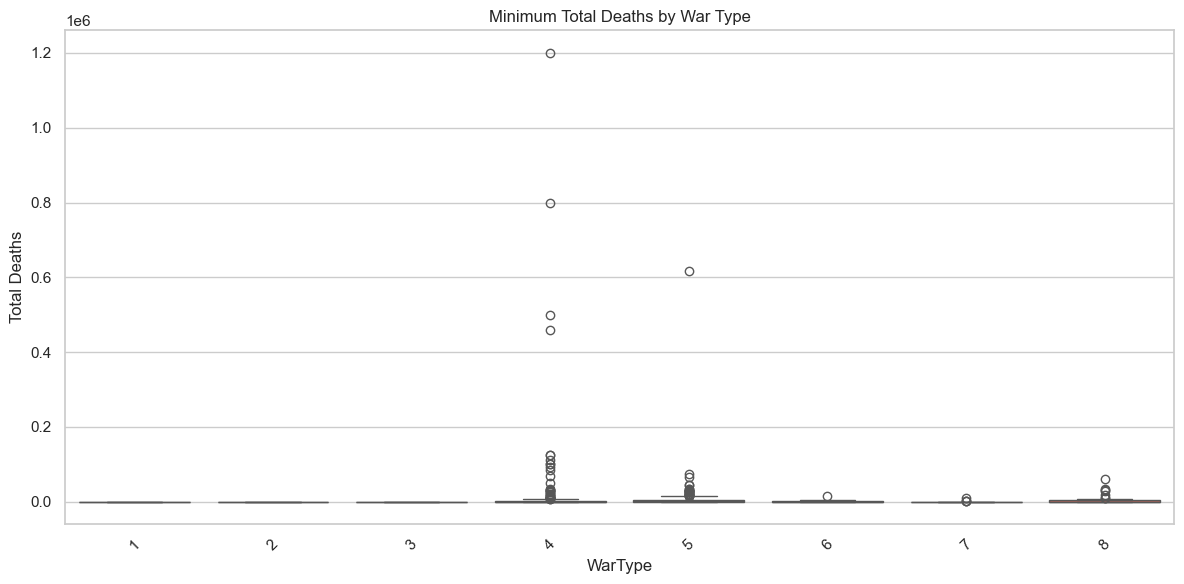

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=eda_df[eda_df['WarType'].isin(valid_war_types)],
            x='WarType', y='TotalDeaths', palette='coolwarm')
plt.title('Minimum Total Deaths by War Type')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
rounded_counts = eda_df[['SideADeaths', 'SideBDeaths']].applymap(lambda x: x % 10 == 0 if pd.notna(x) else False)
print("Rounded Entries (as multiples of 10):")
print(rounded_counts.sum())


Rounded Entries (as multiples of 10):
SideADeaths    224
SideBDeaths    216
dtype: int64


C:\Users\yaksh\AppData\Local\Temp\ipykernel_11164\50207913.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rounded_counts = eda_df[['SideADeaths', 'SideBDeaths']].applymap(lambda x: x % 10 == 0 if pd.notna(x) else False)


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv("CombinedWarData.csv")
df = df.loc[:, ~df.columns.duplicated()]

# Convert deaths to numeric
df['SideADeaths'] = pd.to_numeric(df['SideADeaths'], errors='coerce')
df['SideBDeaths'] = pd.to_numeric(df['SideBDeaths'], errors='coerce')

# Drop columns with >70% missing data
df = df.loc[:, df.isnull().mean() < 0.7]

# Create StartDate and EndDate columns
def combine_date_parts(year, month, day):
    try:
        return pd.to_datetime(f"{int(year)}-{int(month)}-{int(day)}", errors='coerce')
    except:
        return pd.NaT

df['StartDate'] = df.apply(lambda row: combine_date_parts(row['StartYear1'], row['StartMonth1'], row['StartDay1']), axis=1)
df['EndDate'] = df.apply(lambda row: combine_date_parts(row['EndYear1'], row['EndMonth1'], row['EndDay1']), axis=1)
df['DurationDays'] = (df['EndDate'] - df['StartDate']).dt.days
df['DurationMonths'] = df['DurationDays'] / 30.44

# Create TotalDeaths column (fix SettingWithCopyWarning)
df['TotalDeaths'] = df[['SideADeaths', 'SideBDeaths']].sum(axis=1, skipna=True)

# Select features and drop rows with missing target
eda_df = df[['WarType', 'Initiator', 'DurationMonths', 'TotalDeaths']].dropna()

# Feature matrix (X) and target (y)
X = eda_df[['WarType', 'Initiator', 'DurationMonths']]
y = eda_df['TotalDeaths']

# Encode categorical columns
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(" Prediction Results for TotalDeaths")
print(f" RMSE: {rmse:.2f}")
print(f" R² Score: {r2:.2f}")

# Optional: Feature importance
importances = model.feature_importances_
feature_names = X.columns
print("\n Feature Importances:")
for feat, imp in zip(feature_names, importances):
    print(f"{feat}: {imp:.3f}")


 Prediction Results for TotalDeaths
 RMSE: 18102.54
 R² Score: -1.20

 Feature Importances:
WarType: 0.031
Initiator: 0.469
DurationMonths: 0.500


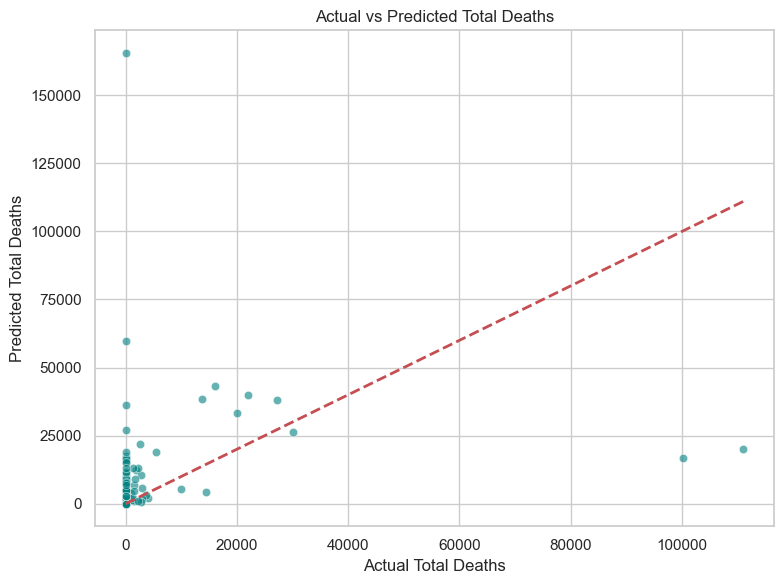

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Total Deaths')
plt.ylabel('Predicted Total Deaths')
plt.title('Actual vs Predicted Total Deaths')
plt.tight_layout()
plt.grid(True)
plt.show()


 Classification Report (Outcome):
              precision    recall  f1-score   support

           0       0.69      0.64      0.66        95
           1       0.31      0.41      0.35        34
           2       0.38      0.33      0.35         9
           3       0.40      0.33      0.36        12
           4       1.00      0.67      0.80         3
           5       0.36      0.33      0.35        12
           6       0.00      0.00      0.00         1

    accuracy                           0.53       166
   macro avg       0.45      0.39      0.41       166
weighted avg       0.55      0.53      0.54       166



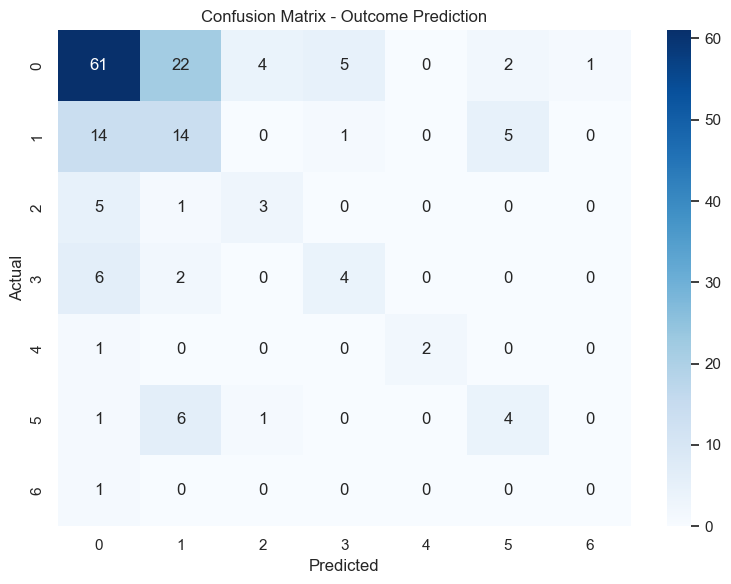

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean
df = pd.read_csv("CombinedWarData.csv")
df = df.loc[:, ~df.columns.duplicated()]
df['SideADeaths'] = pd.to_numeric(df['SideADeaths'], errors='coerce')
df['SideBDeaths'] = pd.to_numeric(df['SideBDeaths'], errors='coerce')
df = df.loc[:, df.isnull().mean() < 0.7]

# Dates
def combine_date_parts(year, month, day):
    try:
        return pd.to_datetime(f"{int(year)}-{int(month)}-{int(day)}", errors='coerce')
    except:
        return pd.NaT

df['StartDate'] = df.apply(lambda row: combine_date_parts(row['StartYear1'], row['StartMonth1'], row['StartDay1']), axis=1)
df['EndDate'] = df.apply(lambda row: combine_date_parts(row['EndYear1'], row['EndMonth1'], row['EndDay1']), axis=1)
df['DurationDays'] = (df['EndDate'] - df['StartDate']).dt.days
df['DurationMonths'] = df['DurationDays'] / 30.44
df['TotalDeaths'] = df[['SideADeaths', 'SideBDeaths']].sum(axis=1, skipna=True)

# Prepare for classification
clf_df = df[['WarType', 'Initiator', 'DurationMonths', 'TotalDeaths', 'Outcome']].dropna()

# Feature matrix and target
X = clf_df[['WarType', 'Initiator', 'DurationMonths', 'TotalDeaths']]
y = clf_df['Outcome']

# Encode categoricals
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Encode target
y = LabelEncoder().fit_transform(y.astype(str))

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print(" Classification Report (Outcome):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Outcome Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


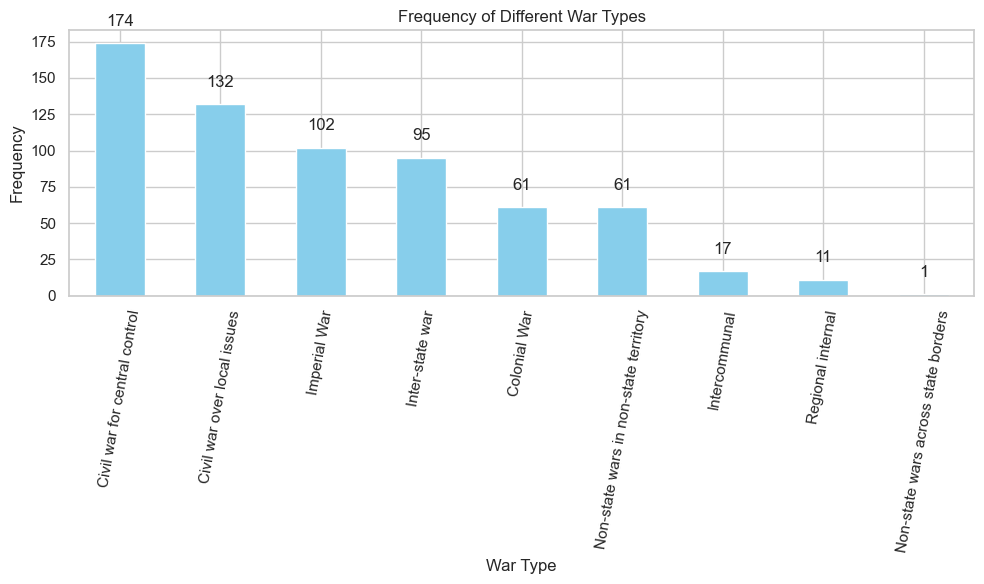

In [17]:
# Encoding for WarType
war_type_encoding = {
    1: 'Inter-state war',
    2: 'Colonial War',
    3: 'Imperial War',
    4: 'Civil war for central control',
    5: 'Civil war over local issues',
    6: 'Regional internal',
    7: 'Intercommunal',
    8: 'Non-state wars in non-state territory',
    9: 'Non-state wars across state borders'
}

# Avoid duplicate WarNum IDs 
df1 = df.drop_duplicates(subset='WarNum')

# Group the data by "WarType" and count the occurrences
war_type_counts = df1['WarType'].map(war_type_encoding).value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6)) 
ax = war_type_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Different War Types')
plt.xlabel('War Type')
plt.ylabel('Frequency')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, horizontalalignment='center')

# Add value labels to the bars
for i, count in enumerate(war_type_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

# Show the bar chart
plt.tight_layout()
plt.show()

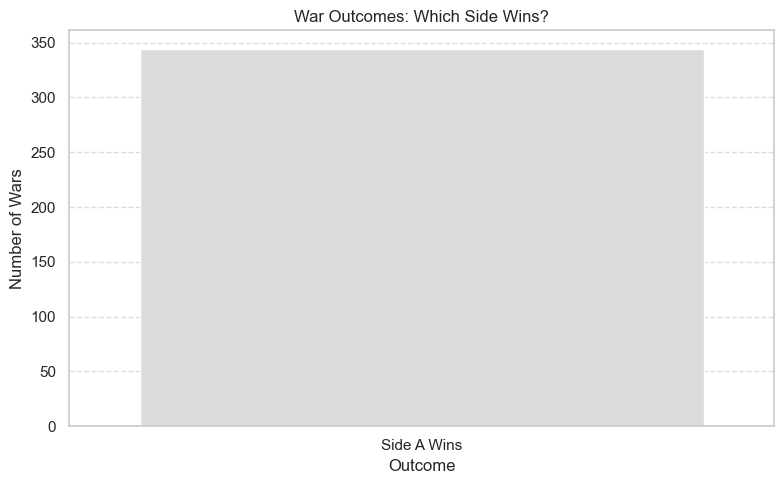

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter valid outcomes (we'll assume: 1 = A wins, -1 = B wins, 0 = Draw)
valid_outcomes = [-1, 0, 1]
eda_df = df[['SideA', 'SideB', 'Outcome']].dropna()
eda_df = eda_df[eda_df['Outcome'].isin(valid_outcomes)]

# Map outcome to readable labels
eda_df['Result'] = eda_df['Outcome'].map({
    1: 'Side A Wins',
    -1: 'Side B Wins',
    0: 'Stalemate'
})

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=eda_df, x='Result', palette='coolwarm')
plt.title('War Outcomes: Which Side Wins?')
plt.xlabel('Outcome')
plt.ylabel('Number of Wars')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


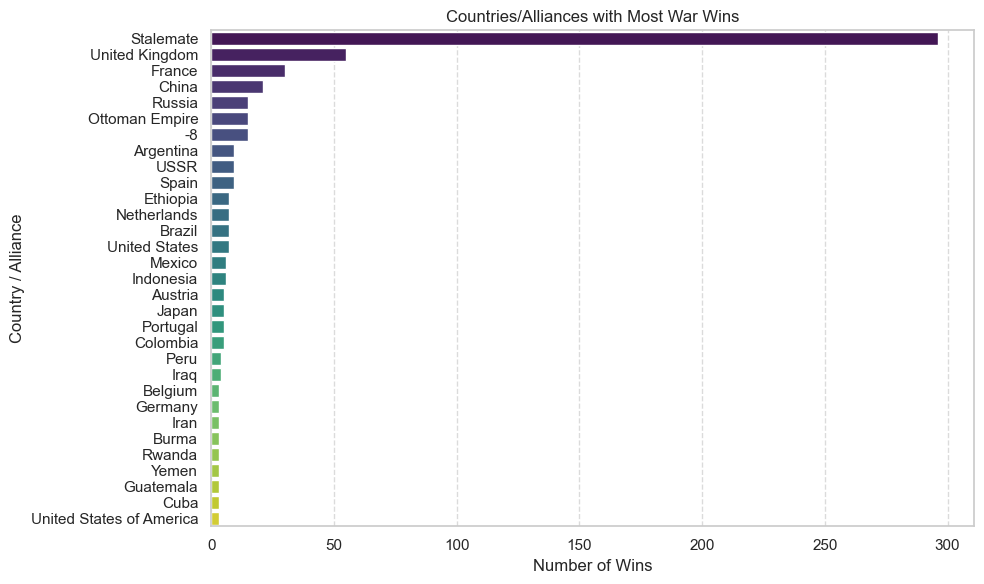

In [20]:
# First, map outcome to which side won
def get_winner(row):
    if row['Outcome'] == 1:
        return row['SideA']
    elif row['Outcome'] == -1:
        return row['SideB']
    else:
        return 'Stalemate'

eda_df = df[['SideA', 'SideB', 'Outcome']].dropna()
eda_df['Winner'] = eda_df.apply(get_winner, axis=1)

# Count number of wins by each side
winner_counts = eda_df['Winner'].value_counts().reset_index()
winner_counts.columns = ['Country/Alliance', 'Win Count']

# Filter top winners for readability (optional)
top_winners = winner_counts[winner_counts['Win Count'] >= 3]  # Only show those with ≥ 3 wins

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_winners, x='Win Count', y='Country/Alliance', palette='viridis')
plt.title('Countries/Alliances with Most War Wins')
plt.xlabel('Number of Wins')
plt.ylabel('Country / Alliance')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


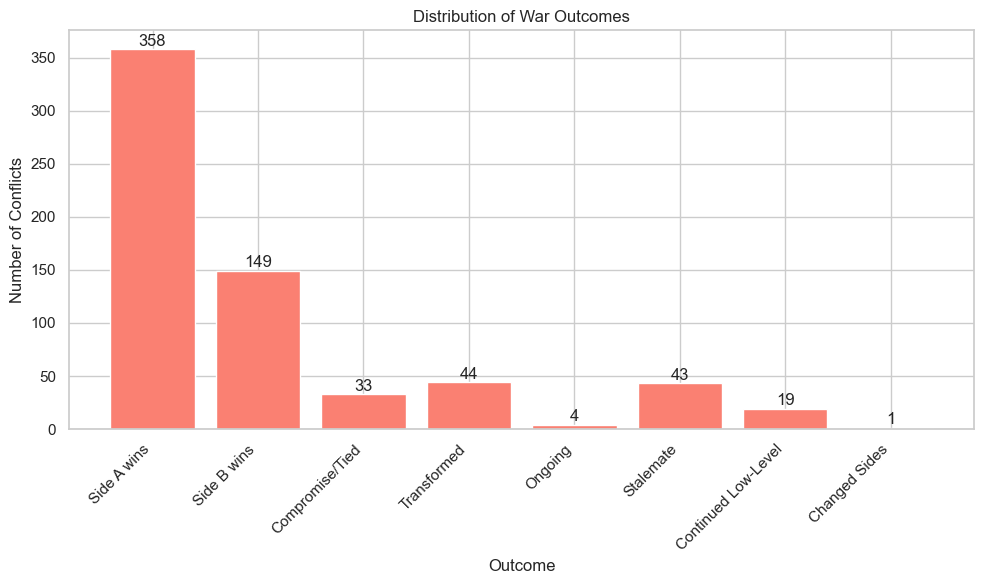

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged dataset
df = pd.read_csv("CombinedWarData.csv")

# Grouping by WarName or ConflictID (if available)
group_col = 'WarName' if 'WarName' in df.columns else 'ConflictID'

# Ensure 'Outcome' column exists or create a proxy
if 'Outcome' in df.columns:
    outcome_col = 'Outcome'
else:
    # Use TypeOfConflict as proxy for outcome if Outcome isn't available
    outcome_col = 'TypeOfConflict'

# Outcome decoding (you can adjust this based on actual values)
outcome_encoding = {
    1: 'Side A wins',
    2: 'Side B wins',
    3: 'Compromise/Tied',
    4: 'Transformed',
    5: 'Ongoing',
    6: 'Stalemate',
    7: 'Continued Low-Level',
    8: 'Changed Sides'
}

# Group the data
df_grouped = df.groupby(group_col).agg({
    outcome_col: 'first'
}).reset_index()

# Count outcomes
outcome_counts = df_grouped[outcome_col].value_counts().sort_index()

# Decode if numeric outcomes
if outcome_counts.index.dtype != 'O':
    outcome_counts.index = outcome_counts.index.map(outcome_encoding)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(outcome_counts.index.astype(str), outcome_counts.values, color='salmon')
plt.title('Distribution of War Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Number of Conflicts')
plt.xticks(rotation=45, ha="right")

# Add count labels
for i, count in enumerate(outcome_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

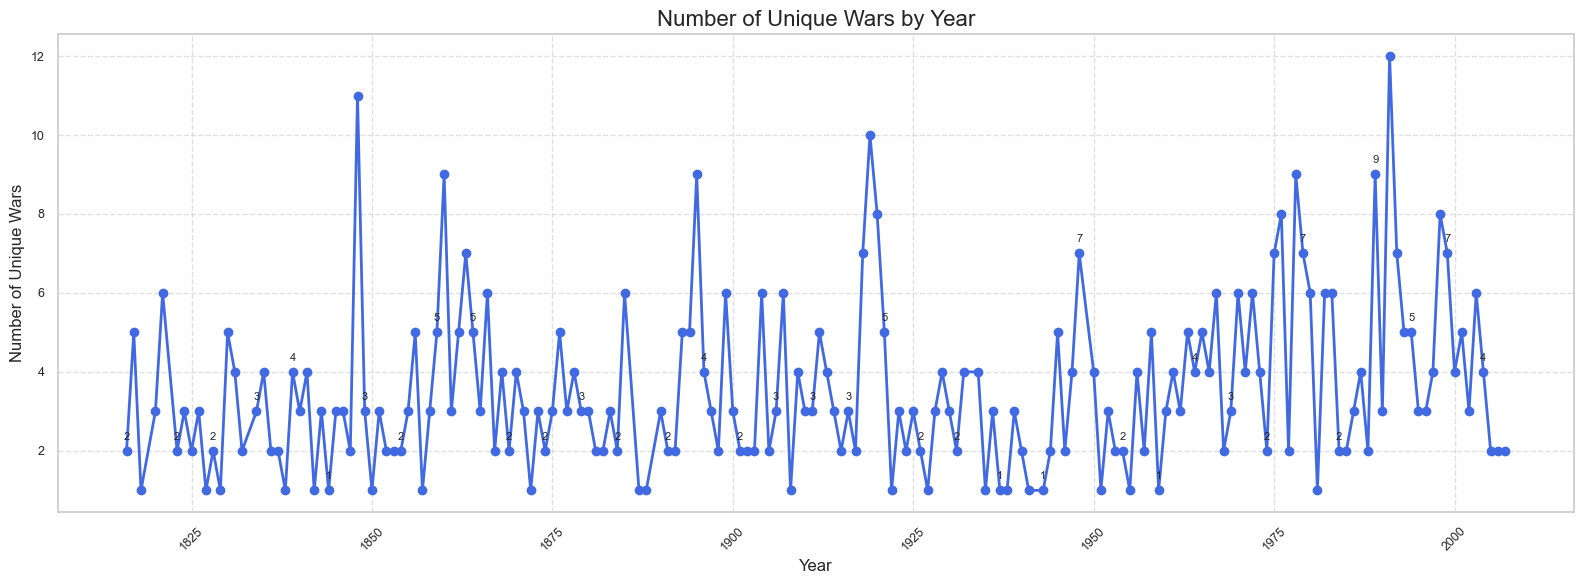

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("CombinedWarData.csv")

# Ensure 'StartYear1' is numeric
df['StartYear1'] = pd.to_numeric(df['StartYear1'], errors='coerce')

# Group by StartYear1 and count unique wars
yearly_counts = df.groupby('StartYear1')['WarNum'].nunique().sort_index()

# Plot
plt.figure(figsize=(16, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', color='royalblue', linewidth=2)
plt.title('Number of Unique Wars by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Unique Wars', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)

# Annotate every 5th year only to reduce clutter
for i, (x, y) in enumerate(zip(yearly_counts.index, yearly_counts.values)):
    if i % 5 == 0:
        plt.annotate(f'{y}', (x, y), textcoords='offset points', xytext=(0, 8), ha='center', fontsize=8)

plt.tight_layout()
plt.show()
